# Algorithm explanation
A dataframe is created after reading the json file. 

From the dataset I sampled 500 recipes and sampled 50 ingredients from nature basked to create the kitchen basket. The nature basket consists of the exhaustive list of the ingredients present in the dataset.

There are seven epochs and in each epoch 1000 new recipes are added.


*   Replacement: For replacement a recipe is randomly chosen from the primordial cuisine. From the recipe the program picks up a random ingredient and checks for the finess value with the randomly chosen ingredient from the kitchen basket. If the modified recipe is not in the primordial cuisine the recipe is appended. The ratio of kitchen basket to the number of cuisine is kept constant.
*   Addition: Here, a randomly chosen ingredient is simply added to the randomly chosen recipe from the primordial cuisine. The ratio of kitchen basket to the number of cuisine is kept constant.
*   Deletion: The ingredient with the lowest fitness value is deleted from the randomly chosen recipe and the ratio is kept constant.




# Preparing Pimordial Cuisine

In [3]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import random
import copy
import operator

In [4]:
# reading the file
df = pd.read_json("train.json")
df_ingredients = df['ingredients'].tolist()
total_recipes = len(df.index)
index = df.index
number_of_rows = len(index)

In [5]:
# creating the nature basket
NB = []
for ingredient_list in df_ingredients:
  for ingredient in ingredient_list:
    if ingredient in NB:
      pass
    else:
      NB.append(ingredient)
total_ingredients = len(NB)

# assigning the fitness values
fitness_value = random.sample(range(0,total_ingredients),total_ingredients)

In [ ]:
# creating the kitchen basket
KB = random.sample(NB, 50)

# taking random recipes from the given dataset
recipes = df.sample(n = 500)

# all components of primordial cuisine are extracted

In [8]:
# calculating the ratio of kitchen basket to the recipes present in the kitchen
def calculate_delta(KB,recipes):
  return len(KB)/len(recipes.index)

# to check whether the modified recipe is already in the kitchen
def is_same(to_check):
  for index, row in recipes.iterrows():
    if row['ingredients']==to_check:
      return True
  return False

# to get the fitness value of a particular ingredient
def get_fitnessValue(ing):
  index = NB.index(ing)
  return fitness_value[index]

# addition in modification of recipe
def add_ingredient(recipes):
  recipe_size = 1000
  modification_recipe = 'temp'

  # add only if the recipe size is less than 10
  while recipe_size>10:
    modification_recipe = recipes.sample()
    recipe_size = len(modification_recipe['ingredients'].tolist()[0])
  modification_recipe_id = int(modification_recipe['id'])
  modification_recipe_ingredients = modification_recipe['ingredients'].tolist()[0]

  ingredient_to_add = modification_recipe_ingredients[0]

  #check whether ingredient to be added is already in the recipe
  while ingredient_to_add in modification_recipe_ingredients:
    ingredient_to_add = random.sample(KB,1)
    ingredient_to_add = ingredient_to_add[0]

  # new recipe to be returned
  to_check = copy.deepcopy(modification_recipe_ingredients)
  to_check.append(ingredient_to_add)

  return_list = [to_check, modification_recipe_id, ingredient_to_add]
  return return_list

# deletion in modification of recipe
def delete_ingredient(recipes,how):
  recipe_size = 0
  modification_recipe = 'temp'

  # check for the recipe size to delete ingredient from
  # ingredient to be deleted from the recipe whose size is greater than 10
  while recipe_size<=10:
    modification_recipe = recipes.sample()
    recipe_size = len(modification_recipe['ingredients'].tolist()[0])
  modification_recipe_id = int(modification_recipe['id'])
  modification_recipe_ingredients = modification_recipe['ingredients'].tolist()[0]

  ingredient_to_delete = 'temp'

  # deleting the ingredient having the lowest fitness value
  if how==0:
    fit_val = get_fitnessValue(modification_recipe_ingredients[0])
    ingredient_to_delete = modification_recipe_ingredients[0]
    for i in range(len(modification_recipe_ingredients)):
      if i!=0:
        temp = get_fitnessValue(modification_recipe_ingredients[i])
        if fit_val>temp:
          fit_val = temp
          ingredient_to_delete = modification_recipe_ingredients[i]
  else:
    ingredient_to_delete = random.sample(modification_recipe_ingredients,1)
    ingredient_to_delete = ingredient_to_delete[0]

  # the modified recipe with the chosen ingredient deleted
  to_check = copy.deepcopy(modification_recipe_ingredients) 
  to_check.remove(ingredient_to_delete)
  return_list = [to_check, modification_recipe_id]
  return return_list
  
# replacement of an ingredient in a chosen recipe
def replace_ingredient(recipes):
  # choosing a random recipe from the kitchen
  modification_recipe = recipes.sample()
  modification_recipe_id = int(modification_recipe['id'])
  modification_recipe_ingredients = modification_recipe['ingredients'].tolist()[0]

  ingredient_from_recipe = ['a']
  fit_val_ing_rec = 0
  ingredient_from_KB = ['a']
  fit_val_ing_KB = 1

  # picking up random ingredient from the chosen recipe and the KB to modify the recipe
  # recplacing only if the fitness value of ingredient from KB is greater than that from chosen recipe
  while ingredient_from_recipe[0]==ingredient_from_KB[0] and fit_val_ing_KB>fit_val_ing_rec:
    ingredient_from_recipe = random.sample(modification_recipe_ingredients,1)
    fit_val_ing_rec = get_fitnessValue(ingredient_from_recipe[0])
    ingredient_from_KB = random.sample(KB,1)
    fit_val_ing_KB = get_fitnessValue(ingredient_from_KB[0])
  
  ingredient_from_recipe = ingredient_from_recipe[0]
  ingredient_from_KB = ingredient_from_KB[0]

  index = modification_recipe_ingredients.index(ingredient_from_recipe)

  # replacing the ingredient of the recipe with ingredient chosen from KB

  to_check = copy.deepcopy(modification_recipe_ingredients) 
  to_check[index] = ingredient_from_KB
  return_list = [to_check, modification_recipe_id, ingredient_from_KB]
  return return_list

# function to plot the recipe size
def plot_recipeSize():
  size = {}
  for index, row in recipes.iterrows():
    ingredients = row['ingredients']
    length = len(ingredients)
    if length in size:
      size[length] = size[length]+1
    else:
      size[length] = 1
  
  sorted_list = sorted(size.keys())
  y_list = []
  total = 0
  for r in sorted_list:
    y_list.append(size[r])
    total = total+size[r]
  for i in range(len(y_list)):
    y_list[i] = y_list[i]/total
  x_axis = sorted_list
  y_axis = y_list
  plt.plot(x_axis, y_axis)
  plt.xlabel("Recipe size")
  plt.ylabel("Percentage")
  plt.title("Recipe Size Distribution for each cuisine")
  plt.show()

# function to plot the frequency rank distribution
def plot_frequencyRank():
  d = {}
  for index,row in recipes.iterrows():
    ingredients = row['ingredients']
    for i in ingredients:
      if i in d:
        d[i] = d[i]+1
      else:
        d[i] = 1
  sorted_matrix = sorted(d.items(),key=operator.itemgetter(1),reverse=True)
  sorted_dict = {}

  for i in range(len(sorted_matrix)):
    sorted_dict[i] = sorted_matrix[i][1]

  x_axis = list(sorted_dict.keys())
  y_axis = list(sorted_dict.values())

  plt.loglog(x_axis,y_axis, label = "frequency rank distribution")
  plt.legend()
  plt.xlabel("Rank")
  plt.ylabel("Frequency")
  plt.title("Frequency Rank Distribution for all recipes")
  plt.show()

# Question 1

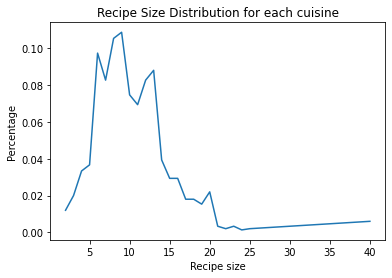

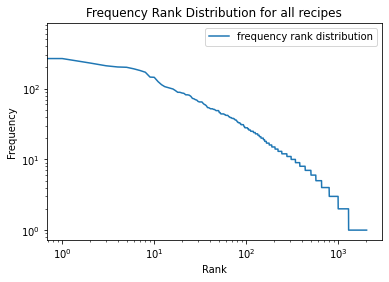

1500


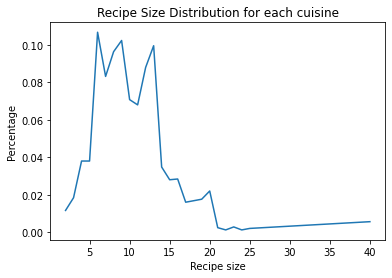

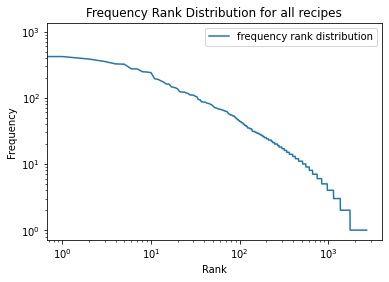

2500


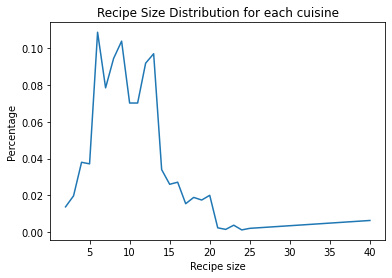

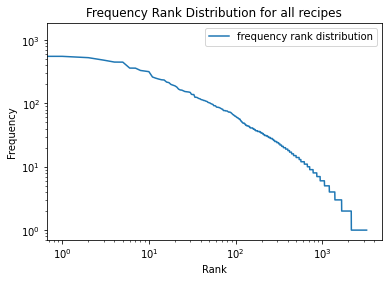

3500


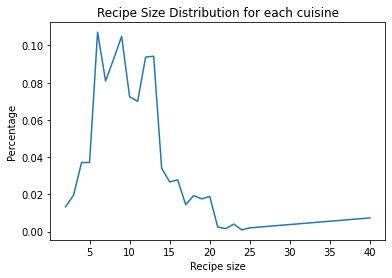

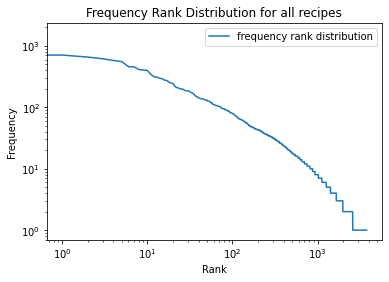

4500


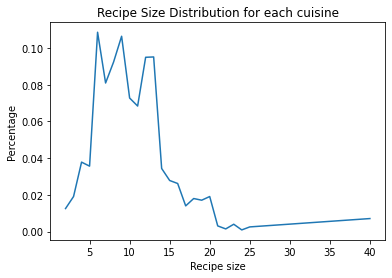

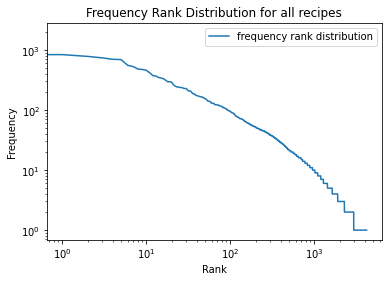

5500


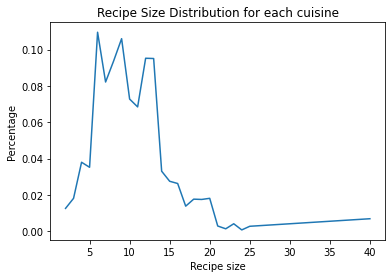

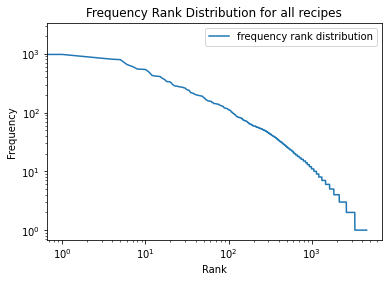

6500


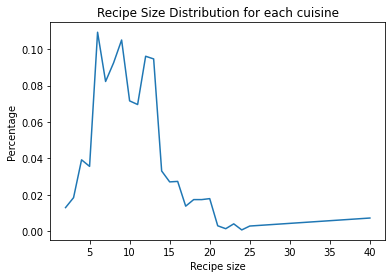

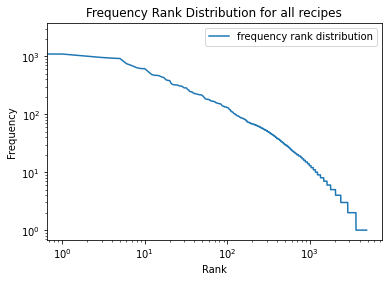

7500


In [ ]:
# Question 1
num_epoch = 7

# at each epoch number of recipes = 1000 and total number of recipess in the cuisine = 7500

for i in range(num_epoch):
  j = 0
  while j<1000:

    # replacing ingredient
    l = replace_ingredient(recipes)
    if is_same(l[0])==False:

      # if successfully replaced append the modified recipe in the kitchen
      row_number = recipes[recipes['id'] == l[1]].index[0]
      cuisine = recipes.loc[row_number,'cuisine']
      to_append = pd.DataFrame({'id':[number_of_rows+1], 'cuisine':[cuisine], 'ingredients':[l[0]]})
      number_of_rows = number_of_rows+1
      recipes = recipes.append(to_append)
      j = j+1
      # remove the ingredient used for modification from kitchen basket
      KB.remove(l[2])

      # calculate delta
      delta = calculate_delta(KB,recipes)

      # sample new ingredients from the nature basket if the delta has decreased
      if delta<0.1:
        while delta<0.1:
          while 0<1:
            ingredient = random.sample(NB,1)
            ingredient = ingredient[0]
            if ingredient in KB:
              continue
            else:
              break
          KB.append(ingredient)
          delta = calculate_delta(KB,recipes) 

  # plot the required graphs       
  plot_recipeSize()
  plot_frequencyRank()
  print(len(recipes.index))

# Question 2

In [10]:
# creating the kitchen basket
KB = random.sample(NB, 50)

# taking random recipes from the given dataset
recipes = df.sample(n = 500)

# all components of primordial cuisine are extracted

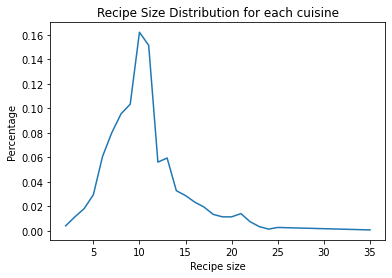

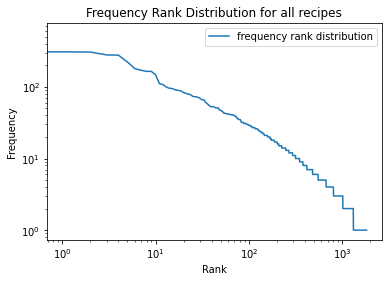

1500


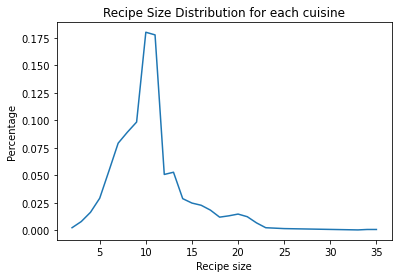

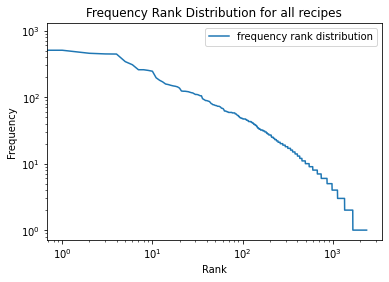

2500


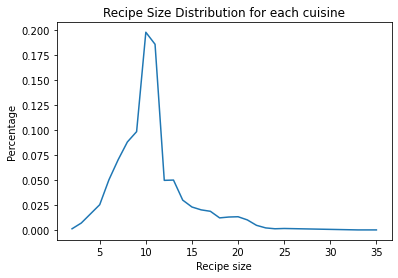

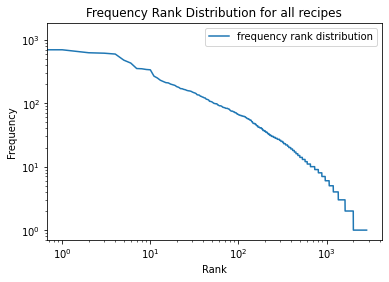

3500


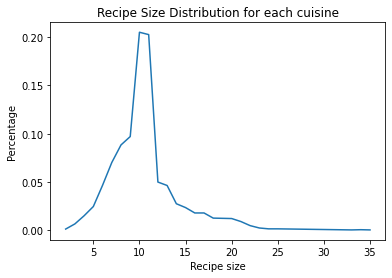

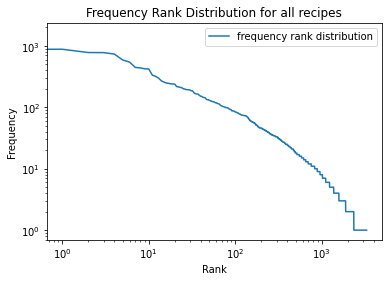

4500


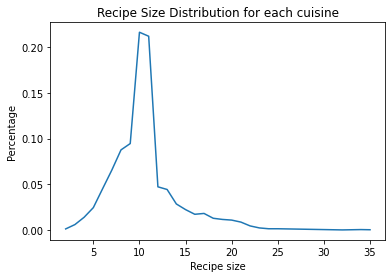

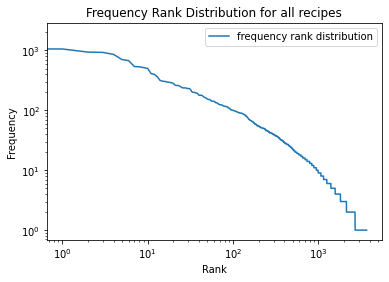

5500


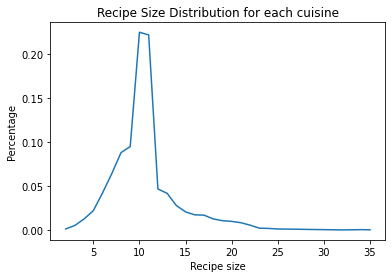

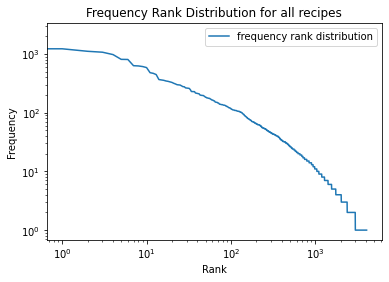

6500


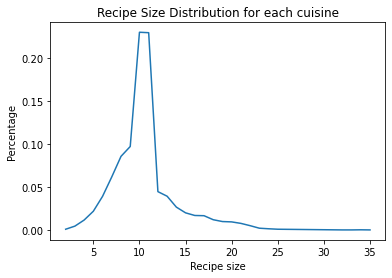

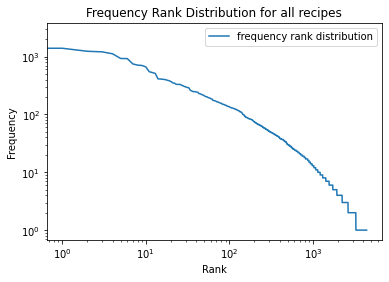

7500


In [11]:
# Question 2
num_epoch = 7

# operation list to choose whether to add, delete or replace
operation_list = [1,2,3]

for i in range(num_epoch):
  j = 0
  while j<1000:

    # choosing the operation
    operation = random.choice(operation_list)

    # replacement of ingredient (same as Question 1)
    if operation==1:
      l = replace_ingredient(recipes)
      if is_same(l[0])==False:
        row_number = recipes[recipes['id'] == l[1]].index[0]
        cuisine = recipes.loc[row_number,'cuisine']
        to_append = pd.DataFrame({'id':[number_of_rows+1], 'cuisine':[cuisine], 'ingredients':[l[0]]})
        number_of_rows = number_of_rows+1
        recipes = recipes.append(to_append)
        j = j+1
        KB.remove(l[2])
        delta = calculate_delta(KB,recipes)
        if delta<0.1:
          while delta<0.1:
            while 0<1:
              ingredient = random.sample(NB,1)
              ingredient = ingredient[0]
              if ingredient in KB:
                continue
              else:
                break
            KB.append(ingredient)
            delta = calculate_delta(KB,recipes) 

    # deletion of ingredient
    elif operation == 2:
      l = delete_ingredient(recipes,0)
      if is_same(l[0])==False:
        row_number = recipes[recipes['id'] == l[1]].index[0]
        cuisine = recipes.loc[row_number,'cuisine']
        to_append = pd.DataFrame({'id':[number_of_rows+1], 'cuisine':[cuisine], 'ingredients':[l[0]]})
        number_of_rows = number_of_rows+1
        recipes = recipes.append(to_append)
        j = j+1
        delta = calculate_delta(KB,recipes)

        # check for delta and sample new ingredients to the kitchen basket if required
        if delta<0.1:
          while delta<0.1:
            while 0<1:
              ingredient = random.sample(NB,1)
              ingredient = ingredient[0]
              if ingredient in KB:
                continue
              else:
                break
            KB.append(ingredient)
            delta = calculate_delta(KB,recipes) 


    # addition of ingredient
    else:
      l = add_ingredient(recipes)
      if is_same(l[0])==False:
        row_number = recipes[recipes['id'] == l[1]].index[0]
        cuisine = recipes.loc[row_number,'cuisine']
        to_append = pd.DataFrame({'id':[number_of_rows+1], 'cuisine':[cuisine], 'ingredients':[l[0]]})
        number_of_rows = number_of_rows+1
        recipes = recipes.append(to_append)
        j = j+1

        # remove the added ingredient from the kitchen basket
        KB.remove(l[2])
        delta = calculate_delta(KB,recipes)

        # check for delta and sample new ingredients to the kitchen basket if required
        if delta<0.1:
          while delta<0.1:
            while 0<1:
              ingredient = random.sample(NB,1)
              ingredient = ingredient[0]
              if ingredient in KB:
                continue
              else:
                break
            KB.append(ingredient)
            delta = calculate_delta(KB,recipes) 

  # plot the required graphs
  plot_recipeSize()
  plot_frequencyRank()
  print(len(recipes.index))

# Runtime Explanation